In [44]:
import pandas as pd
from keras import layers, models, optimizers, losses, metrics 

import pandas as pd
import numpy as np
from keras.utils import np_utils
import keras
from keras.models  import Sequential
from keras import layers
from keras.optimizers import gradient_descent_v2 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow_addons as tfa
import tensorflow as tf

In [45]:
tf.version.VERSION

'2.9.1'

In [46]:
dati = pd.read_csv('datimodelli.csv')
dati = dati[['pm10','pioggia','temperatura','vento','O3','pm2p5']]
dati.head()

,pm10,pioggia,temperatura,vento,O3,pm2p5
0,110.101449,0.402778,0.587884,2.090194,9.823586,96.045455
1,76.591549,0.238000,0.373400,3.001944,10.212938,55.760000
2,49.943662,0.212500,0.665049,2.112000,32.680785,34.120000
3,48.942029,0.216667,0.321896,1.110806,44.895725,30.961538
4,63.197183,0.250000,0.232639,0.986722,65.688729,17.173913


In [47]:
mean = dati.mean(axis=0)
dati -= mean
std = dati.std(axis=0)
dati /= std

In [48]:
df, cl = (dati[['pioggia','temperatura','vento','O3','pm2p5']], dati['pm10'])
x_train, x_test, y_train, y_test = train_test_split(df, cl, test_size=0.3)

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation ='relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])

In [56]:
model.fit(x_train, y_train, epochs = 30, batch_size = 1, verbose = 1)

Epoch 1/30
2711/2711 [==============================] - 4s 1ms/step - loss: 0.4782 - mae: 0.4115 - MAPE: 247.9230
Epoch 2/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.4097 - mae: 0.3859 - MAPE: 246.1584
Epoch 3/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3792 - mae: 0.3786 - MAPE: 254.5262
Epoch 4/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3481 - mae: 0.3673 - MAPE: 227.4918
Epoch 5/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3388 - mae: 0.3639 - MAPE: 240.6393
Epoch 6/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3395 - mae: 0.3670 - MAPE: 225.8082
Epoch 7/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3384 - mae: 0.3623 - MAPE: 238.0686
Epoch 8/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3343 - mae: 0.3586 - MAPE: 223.3028
Epoch 9/30
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3304 - mae

In [57]:
mse, mae = model.evaluate(x_test, y_test, verbose = 0)
print(mse, mae)

0.35924360156059265 0.3735334873199463 179.40992736816406


37/37 [==============================] - 0s 1ms/step


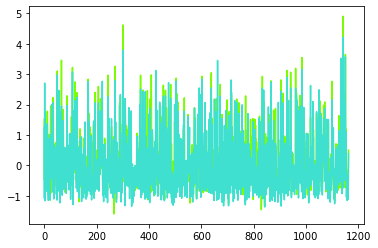

In [64]:
import matplotlib.pyplot as plt
plt.plot(model.predict(x_test),  label = "Previsioni", color='lawngreen')
plt.plot(list(y_test), label = "Valori Osservati", color='turquoise')

Miglioriamo il modello mantenedo una densenet

In [79]:
model = models.Sequential()
model.add(layers.Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))

model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(optimizer = 'rmsprop', loss='mean_absolute_error', metrics=['mae'])

In [90]:
model.fit(x_train, y_train, epochs = 10, batch_size = 1, verbose = 1)

Epoch 1/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3110 - mae: 0.3110
Epoch 2/10
2711/2711 [==============================] - 10s 4ms/step - loss: 0.3116 - mae: 0.3116
Epoch 3/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3112 - mae: 0.3112
Epoch 4/10
2711/2711 [==============================] - 7s 3ms/step - loss: 0.3097 - mae: 0.3097
Epoch 5/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3076 - mae: 0.3076
Epoch 6/10
2711/2711 [==============================] - 7s 3ms/step - loss: 0.3075 - mae: 0.3075
Epoch 7/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3086 - mae: 0.3086
Epoch 8/10
2711/2711 [==============================] - 7s 3ms/step - loss: 0.3058 - mae: 0.3058
Epoch 9/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3083 - mae: 0.3083
Epoch 10/10
2711/2711 [==============================] - 8s 3ms/step - loss: 0.3056 - mae: 0.3056


In [91]:
mae, mae = model.evaluate(x_test, y_test, verbose = 0)
print(mae)

0.334747314453125


37/37 [==============================] - 0s 2ms/step


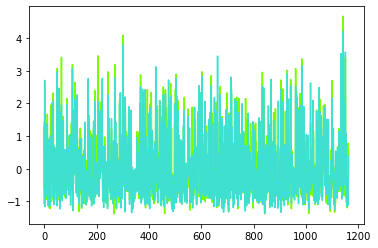

In [96]:
import matplotlib.pyplot as plt
plt.plot(model.predict(x_test),  label = "Previsioni", color='lawngreen')
plt.plot(list(y_test), label = "Valori Osservati", color='turquoise')

XGBoost

In [97]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  0.3735833079307122


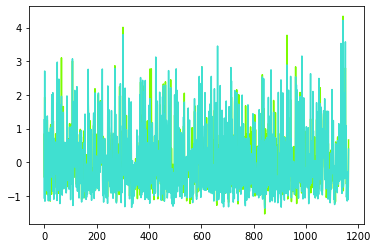

In [101]:
import matplotlib.pyplot as plt
plt.plot(list(XGBpredictions),  label = "Previsioni", color='lawngreen')
plt.plot(list(y_test), label = "Valori Osservati", color='turquoise')

Dimostriamo il fallimento delle CNN

In [108]:
model3 = Sequential()

model3.add(layers.Conv1D(64, kernel_size=3, activation = 'relu', input_shape = x_train.shape))
model3.add(layers.MaxPooling1D(pool_size=2))
model3.add(layers.Conv1D(128, kernel_size=3, activation = 'relu', padding = 'same'))
model3.add(layers.MaxPooling1D(pool_size=2))
model3.add(layers.Dropout(rate = 0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation = 'relu'))
model3.add(layers.Dropout(rate = 0.5))
model.add(layers.Dense(1, kernel_initializer='normal', activation='softmax'))

model.compile(optimizer = 'rmsprop', loss='mean_absolute_error', metrics=['mae'])

In [109]:
model.fit(x_train, y_train, epochs = 30, batch_size = 1, verbose = 1)

Epoch 1/30
2711/2711 [==============================] - 12s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 2/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 3/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 4/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 5/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 6/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 7/30
2711/2711 [==============================] - 11s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 8/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 9/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 10/30
2711/2711 [==============================] - 10s 4ms/step - loss: 1.2838 - mae: 1.2838
Epoch 11/30
2711/27

In [111]:
mae, mae = model.evaluate(x_test, y_test, verbose = 0)
print(mae)

1.237671971321106


37/37 [==============================] - 0s 2ms/step


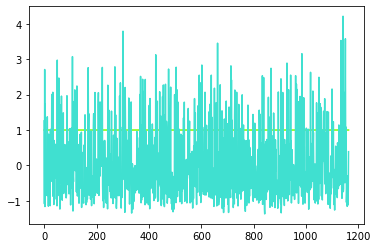

In [113]:
import matplotlib.pyplot as plt
plt.plot(model.predict(x_test),  label = "Previsioni", color='lawngreen')
plt.plot(list(y_test), label = "Valori Osservati", color='turquoise')

Modello supercomplesso

In [114]:
model = models.Sequential()
model.add(layers.Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

model.add(layers.Dense(8192, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(4096, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(2048, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(1024, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(512, kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))

model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(optimizer = 'rmsprop', loss='mean_absolute_error', metrics=['mae'])

In [115]:
model.fit(x_train, y_train, epochs = 5, batch_size = 1, verbose = 1)

Epoch 1/5
2711/2711 [==============================] - 1250s 460ms/step - loss: 0.5844 - mae: 0.5844
Epoch 2/5
2711/2711 [==============================] - 1234s 455ms/step - loss: 0.4265 - mae: 0.4265
Epoch 3/5
2711/2711 [==============================] - 1123s 414ms/step - loss: 0.4095 - mae: 0.4095
Epoch 4/5
2711/2711 [==============================] - 1086s 401ms/step - loss: 0.3991 - mae: 0.3991
Epoch 5/5
2711/2711 [==============================] - 1090s 402ms/step - loss: 0.3859 - mae: 0.3859


In [116]:
mae, mae = model.evaluate(x_test, y_test, verbose = 0)
print(mae)

0.39160627126693726


0.39160627126693726

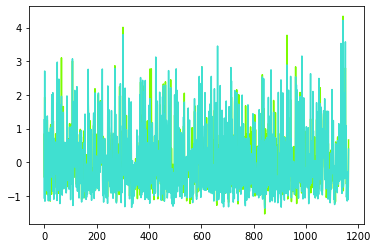

In [117]:
import matplotlib.pyplot as plt
plt.plot(list(XGBpredictions),  label = "Previsioni", color='lawngreen')
plt.plot(list(y_test), label = "Valori Osservati", color='turquoise')